# Home assigment 1

Please give your name below:

In [ ]:
name='Alexander Hedene'

# Exercise 3

You will work a bit more with reading ASCII files (I can attest, this is a routine daily task for a nuclear reactor analyst). In the attached folder (called 'train') you find several spent nuclear fuel inventories generated with the Monte Carlo transport code Serpent2. You will learn later during the course more about spent nuclear fuel, in this exercise you will need to focus only on scripting. The naming convention of the files within the folder describes the burnup or BU (ie. how long the fuel was in the reactor, and how much energy was released from it) and cooling time or CT (ie. how long the fuel was cooled after irradiation): for example 'trainBU46.00CT26.18.bumat2' belongs to a case where the burnup was 46.00 MWd/kgU and the fuel was cooled for 26.18 years after leaving the reactor. Note, that the files also contain burnup and time information, however that time is not just the cooling time, it also includes the time the fuel spent in the reactor.

The isotopes are listed with their ZAID (ie. an ID constructed as $Z\cdot1000+A$) in the files, all ending with '.15c' which refers to the temperature in the calculation, not relevant for your task. For example U235 you will find as '92235.15c'. The inventory is given as atomic concentrations for each nuclide with units $b^{-1}cm^{-1}=\frac{1}{b\cdot cm}=\frac{1}{10^{-24}cm^3}=\frac{10^{24}}{cm^3}$.  

1. Write a function which receives a filename as an input and then extracts the file content into a dictionary. Store both the concentrations and the burnup/cooling time information based on the filenames. Then apply this function to all the files (hint: you can use `os.listdir(foldername)` to list the files in the folder, for this you have to `import os`. You can read about the `os` package at [the documentation site](https://docs.python.org/3/library/os.html).)

2. Plot the concentration of Cs-137 against burnup with 'x' markers. Use 
    - blue marker if the cooling time is between 5 and 10 years.
    - red marker if the cooling time is between 10 and 15 years.
    - green marker if the cooling time is between 15 and 20 years
    - yellow marker if the cooling time is between 20 and 25 years
    - magenta marker if the cooling time is above 25 years
    - (Note you can use other colors if you prefer so, the important part is to use 5 distinct colors for these cooling time intervals).

3. Convert the concentrations to activity concentration (Bq/cm3) for Cs137, Cs134 and Eu154 (hint: you can look up the half-lifes from the internet, and make sure that you convert the units correctly). 
    - Plot the activity concentrations against burnup for the three isotopes in one figure. Use a legend.
    - Plot the activity concentrations after the fuel was removed from the reactor against burnup for the three isotopes in one figure. Use a legend. (Hint, you will need to use the cooling time information, and the decay law to figure out what was the activity before the cooling has started.)
    
4. Write a few sentences about your conclusions.

In [ ]:
import os
import re
import pandas as pd


def extract_data(file_path):
    data = {}
    # Extracts burnup (BU) and cooling time (CT) from the file name and reads the inventory data.
    match = re.search(r'BU(\d+\.\d+)CT(\d+\.\d+)', file_path)
    data['BU'] = float(match.group(1)) if match else None
    data['CT'] = float(match.group(2)) if match else None
    
    # Reads the file and extracts the inventory data.
    # The inventory data is stored in a dictionary with ZAID as keys and concentration as values.
    with open(file_path, 'r') as file:
        file_data = file.readlines()
        
    data['inventory'] = {}
    for line in file_data[7:-1]: # Skip the first 7 lines since they are headers
        ZAID = int(line.split('.')[0].strip())
        conc = float(line.split()[1]) 
        data['inventory'][ZAID] = conc
    return data

# Function to read all .bumat2 files in the 'train' directory and extract their data.
def read_all_data():
    data_list = []
    for file in os.listdir('train'):
        if file.endswith('.bumat2'):
            file_path = os.path.join('train', file)
            data = extract_data(file_path)
            data_list.append(data)
    return data_list

#  Reads all data from the 'train' directory and stores it in a list.
# Each element in the list is a dictionary containing burnup, cooling time, and inventory data
train_list = read_all_data()

# Creates DataFrames for Cs-137, Cs-134, and Eu-154 isotopes.
# Each DataFrame contains burnup, cooling time, and concentration for the respective isotope.
cs137_info = pd.DataFrame(index=range(len(train_list)), columns=['BU', 'CT', 'Concentration'])
cs134_info = pd.DataFrame(index=range(len(train_list)), columns=['BU', 'CT', 'Concentration'])
Eu154_info = pd.DataFrame(index=range(len(train_list)), columns=['BU', 'CT', 'Concentration'])

# Populates the DataFrames with the respective data from the train_list.
for i, elem in enumerate(train_list):
    if 55137 in elem['inventory']:
        cs137_info.loc[i] = [elem['BU'], elem['CT'], float(elem['inventory'][55137])]
    if 55134 in elem['inventory']:
        cs134_info.loc[i] = [elem['BU'], elem['CT'], float(elem['inventory'][55134])]
    if 63154 in elem['inventory']:
        Eu154_info.loc[i] = [elem['BU'], elem['CT'], float(elem['inventory'][63154])]
    
        
    
    

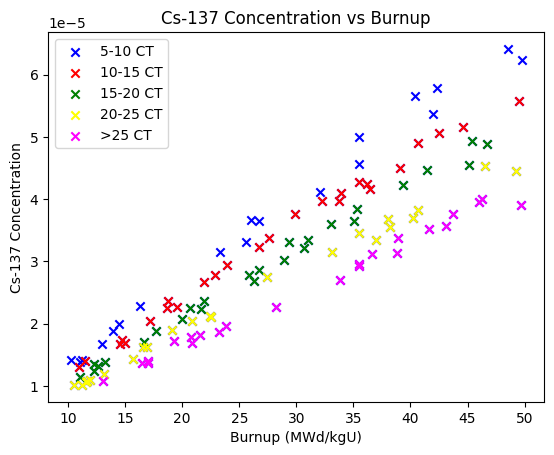

In [ ]:
import matplotlib.pyplot as plt

# Plots the decay concentration of Cs-137, Cs-134, and Eu-154 isotopes against burnup.
blue_plot = cs137_info[(cs137_info['CT'])> 5 & (cs137_info['CT'] < 10)]
plt.scatter(blue_plot['BU'], blue_plot['Concentration'], c='blue', marker='x', label='5-10 CT')

red_plot = cs137_info[(cs137_info['CT'] >= 10) & (cs137_info['CT'] < 15)]
plt.scatter(red_plot['BU'], red_plot['Concentration'], c='red',marker='x', label='10-15 CT')

green_plot = cs137_info[(cs137_info['CT'] >= 15) & (cs137_info['CT'] < 20)]
plt.scatter(green_plot['BU'], green_plot['Concentration'], c='green', marker='x', label='15-20 CT')

yellow_plot = cs137_info[(cs137_info['CT'] >= 20) & (cs137_info['CT'] < 25)]
plt.scatter(yellow_plot['BU'], yellow_plot['Concentration'], c='yellow', marker='x', label='20-25 CT')

magenta_plot = cs137_info[(cs137_info['CT'] >= 25)]
plt.scatter(magenta_plot['BU'], magenta_plot['Concentration'], c='magenta', marker='x', label='>25 CT')

plt.xlabel('Burnup (MWd/kgU)')
plt.ylabel('Cs-137 Concentration')
plt.title('Cs-137 Concentration vs Burnup')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# half-lives in seconds for the isotopes
hl_eu154 = 8.6*365*24*3600
hl_cs134 = 2.065*365*24*3600
hl_cs137 = 30.2*365*24*3600

# decay constants for the isotopes
lambda_eu154 = np.log(2)/hl_eu154
lambda_cs134 = np.log(2)/hl_cs134
lambda_cs137 = np.log(2)/hl_cs137

# Convert columns to float for calculations
for df in [cs137_info, cs134_info, Eu154_info]:
	df['Concentration'] = df['Concentration'].astype(float)
	df['CT'] = df['CT'].astype(float)
	df['BU'] = df['BU'].astype(float)

# Calculate decay concentration for each isotope
cs137_info['Decay_concentration'] = cs137_info['Concentration'] * lambda_cs137 * 1e+24
cs134_info['Decay_concentration'] = cs134_info['Concentration'] * lambda_cs134 * 1e+24
Eu154_info['Decay_concentration'] = Eu154_info['Concentration'] * lambda_eu154 * 1e+24

# Calculate initial decay concentration for each isotope
# The initial decay concentration is calculated using the time depended decay formula:
cs137_info['Init_Decay_concentration'] = cs137_info['Concentration'] * np.exp(cs137_info['CT'] * 365 * 24 * 3600 * lambda_cs137) * 1e+24
cs134_info['Init_Decay_concentration'] = cs134_info['Concentration'] * np.exp(cs134_info['CT'] * 365 * 24 * 3600 * lambda_cs134) * 1e+24
Eu154_info['Init_Decay_concentration'] = Eu154_info['Concentration'] * np.exp(Eu154_info['CT'] * 365 * 24 * 3600 * lambda_eu154) * 1e+24


Text(0.5, 1.0, 'Decay Concentration vs Burnup after cooling')

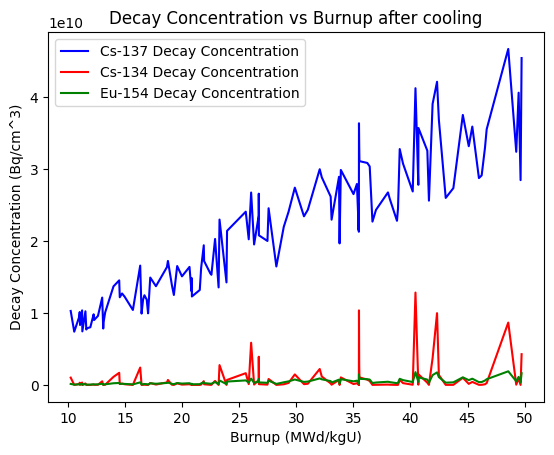

In [69]:
plt.plot(cs137_info['BU'], cs137_info['Decay_concentration'], 'b-', label='Cs-137 Decay Concentration')
plt.plot(cs134_info['BU'], cs134_info['Decay_concentration'], 'r-', label='Cs-134 Decay Concentration')
plt.plot(Eu154_info['BU'], Eu154_info['Decay_concentration'], 'g-', label='Eu-154 Decay Concentration')

plt.legend()
plt.xlabel('Burnup (MWd/kgU)')
plt.ylabel('Decay Concentration (Bq/cm^3)')
plt.title('Decay Concentration vs Burnup after cooling')

Text(0, 0.5, 'Decay Concentration (Bq/cm^3)')

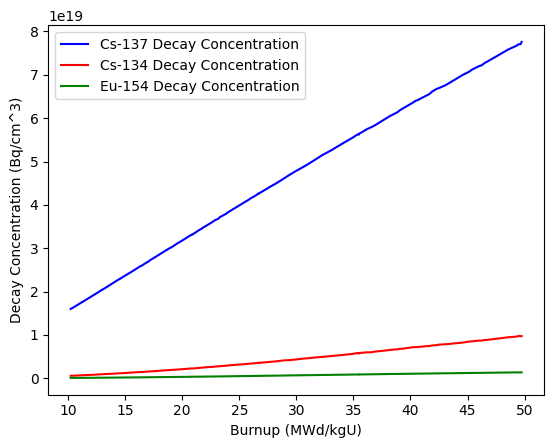

In [65]:
plt.plot(cs137_info['BU'], cs137_info['Init_Decay_concentration'], 'b-', label='Cs-137 Decay Concentration')
plt.plot(cs134_info['BU'], cs134_info['Init_Decay_concentration'], 'r-', label='Cs-134 Decay Concentration')
plt.plot(Eu154_info['BU'], Eu154_info['Init_Decay_concentration'], 'g-', label='Eu-154 Decay Concentration')

plt.legend()
plt.xlabel('Burnup (MWd/kgU)')
plt.ylabel('Decay Concentration (Bq/cm^3)')
plt.title('Decay Concentration vs Burnup before cooling has started')

## Conclusion about the results

# Before cooling
Before any cooling, a clear trend is observed for all isotopes, with higher burnup leading to a higher decay concentration. Cs-137 has a significantly higher decay concentration than the other two isotopes. This is logical since higher burnup means more fission.

# After cooling
After the cooling time, a distinct trend becomes apparent. The Cs-137 shows a similar behaviour but with a much lower decay concentration (10^9 magnitudes of reduction). A much different story can be seen for the other two isotopes. These are both much lower. The difference can be explained by the longer half-life of Cs137 of 20.3 in comparison to 8.6 (eu) and 2.065 (cs134). 

Fluctuations can also be seen after the cooling time, which is logical since this is a probabilistic process.